In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [0]:
!pip install kaggle

In [0]:
pwd

'/content'

In [0]:
mkdir .kaggle

In [0]:
#importing json file
import json
token = {"username":"","key":""}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
ls -la

total 20
drwxr-xr-x 1 root root 4096 Jan  8 05:30 ./
drwxr-xr-x 1 root root 4096 Jan  8 05:29 ../
drwxr-xr-x 1 root root 4096 Dec 18 16:52 .config/
drwxr-xr-x 2 root root 4096 Jan  8 05:30 .kaggle/
drwxr-xr-x 1 root root 4096 Dec 18 16:52 sample_data/


In [0]:
cd /root

/root


In [0]:
ls -la

total 64
drwx------ 1 root root 4096 Jan  8 05:29 ./
drwxr-xr-x 1 root root 4096 Jan  8 05:29 ../
-rw-r--r-- 1 root root 3106 Apr  9  2018 .bashrc
drwxr-xr-x 1 root root 4096 Dec 18 17:25 .cache/
drwx------ 4 root root 4096 Dec 18 17:24 .config/
drwxr-xr-x 3 root root 4096 Dec 18 16:53 .gsutil/
drwxr-xr-x 1 root root 4096 Dec 18 17:23 .ipython/
drwx------ 2 root root 4096 Dec 18 17:23 .jupyter/
drwxr-xr-x 2 root root 4096 Jan  8 05:29 .keras/
drwx------ 1 root root 4096 Dec 18 17:23 .local/
drwxr-xr-x 3 root root 4096 Dec 18 17:23 .node-gyp/
drwxr-xr-x 4 root root 4096 Dec 18 17:23 .npm/
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile


In [0]:
!mkdir .kaggle

In [0]:
cd /root/.kaggle

/root/.kaggle


In [0]:
!cp /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json

In [0]:
ls -la

total 16
drwxr-xr-x 2 root root 4096 Jan  8 05:30 ./
drwx------ 1 root root 4096 Jan  8 05:30 ../
-rw-r--r-- 1 root root   70 Jan  8 05:30 kaggle.json


In [0]:
cd /content

/content


In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign -p /content/traffic

 98% 601M/612M [00:05<00:00, 128MB/s]
100% 612M/612M [00:05<00:00, 126MB/s]


In [0]:
cd /content/traffic


/content/traffic


In [0]:
!unzip '/content/traffic/gtsrb-german-traffic-sign.zip'

Archive:  /content/traffic/gtsrb-german-traffic-sign.zip
  inflating: Meta.csv                
  inflating: Meta/.~lock.ClassesInformation.ods#  
  inflating: Meta/.~lock.ClassesInformationStrong.ods#  
  inflating: Meta/0.png              
  inflating: Meta/1.png              
  inflating: Meta/10.png             
  inflating: Meta/11.png             
  inflating: Meta/12.png             
  inflating: Meta/13.png             
  inflating: Meta/14.png             
  inflating: Meta/15.png             
  inflating: Meta/16.png             
  inflating: Meta/17.png             
  inflating: Meta/18.png             
  inflating: Meta/19.png             
  inflating: Meta/2.png              
  inflating: Meta/20.png             
  inflating: Meta/21.png             
  inflating: Meta/22.png             
  inflating: Meta/23.png             
  inflating: Meta/24.png             
  inflating: Meta/25.png             
  inflating: Meta/26.png             
  inflating: Meta/27.png             

In [0]:
path = '/content/traffic/train'

In [0]:
# create a data bunch
np.random.seed(42)
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=False), 
                                  size=224, num_workers=0, 
                                  bs=32, valid_pct=0.2).normalize(imagenet_stats)

In [0]:
len(data.train_ds), len(data.valid_ds)

(31368, 7841)

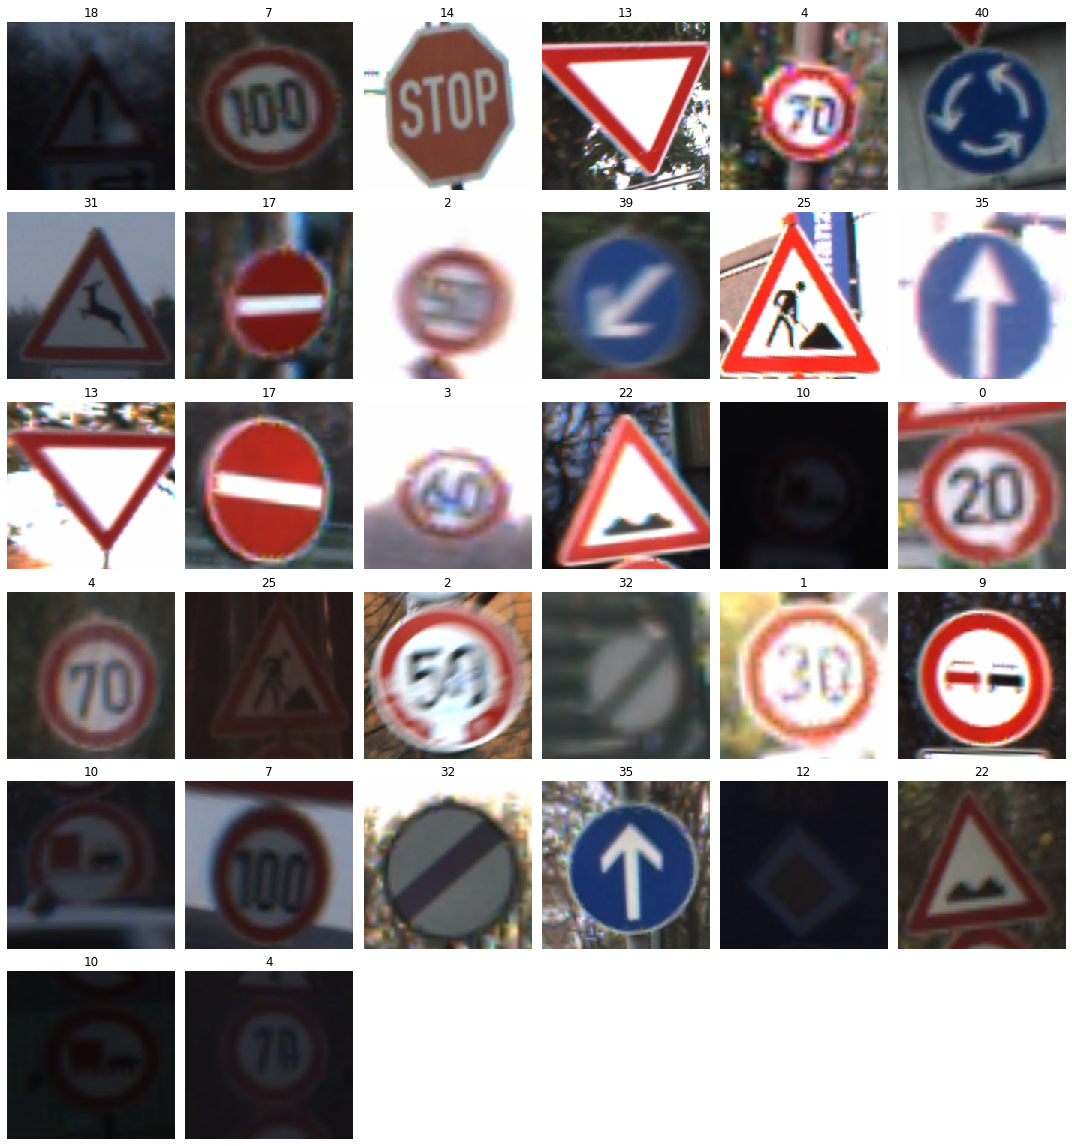

In [0]:
# display 6 rows of data
data.show_batch(rows=6, figsize=(15,16))

In [0]:
# verify the classes
print(data.classes)
len(data.classes),data.c

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


(43, 43)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
# fit 6 layers
learn.fit_one_cycle(6)

In [0]:
pwd

'/content/traffic'

In [0]:
learn.save('stage-1')

In [0]:
learn.export('traffic.pkl')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


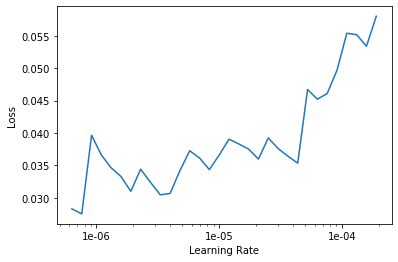

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2)

In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

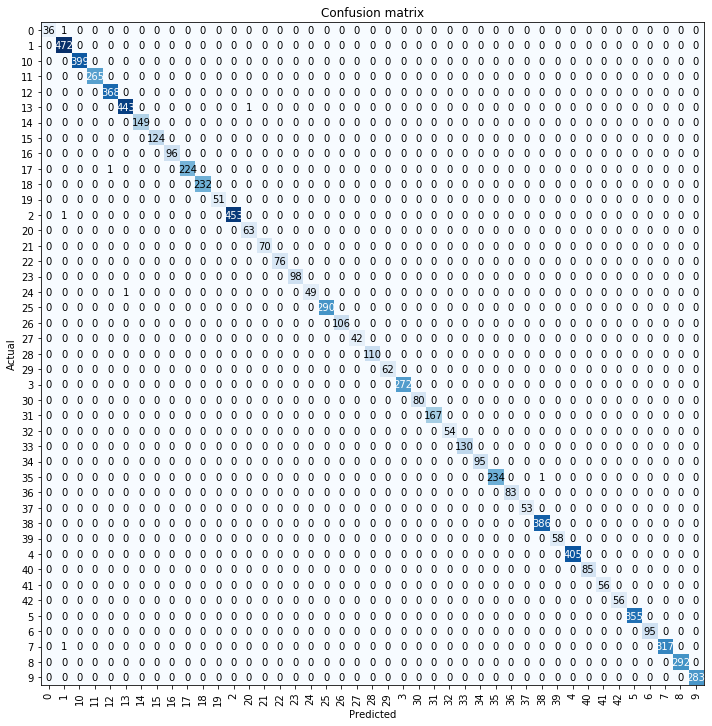

In [0]:

interp.plot_confusion_matrix(figsize=(10,10))

In [0]:
# interpret the results
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

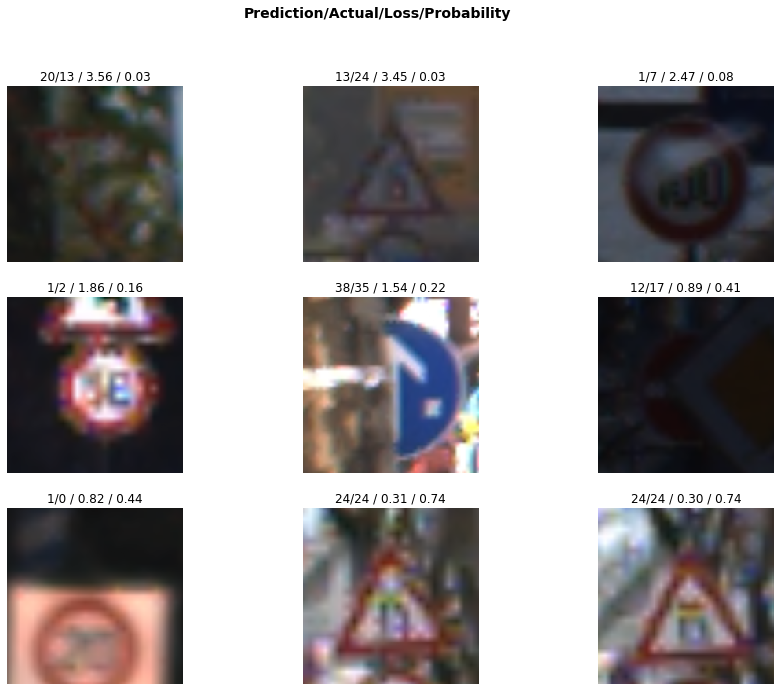

In [0]:
# plot the top losses
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
from fastai.callbacks.hooks import *
def plot_top_losses_heatmap(k,learner, largest= True,figsize=(15,11)):
    tl_val,tl_idx = interp.top_losses(k,largest)
    print (tl_idx)
    classes = interp.data.classes
    rows = math.ceil(math.sqrt(k))
    fig,axes = plt.subplots(rows,rows,figsize=figsize)
    fig.suptitle('prediction/actual/loss/probability', weight='bold', size=14)
    for i,idx in enumerate(tl_idx):
        im,cl = interp.data.valid_ds[idx]
        cl = int(cl)
        ###
        xb,_ = data.one_item(im)
        xb = xb.cuda()
        m = learner.model.eval()
        with hook_output(m[0]) as hook_a:
            with hook_output(m[0], grad= True) as hook_g:
                preds = m(xb)
                preds[0,cl].backward()
        acts = hook_a.stored[0].cpu()
        avg_acts =acts.mean(0)
        sz = im.shape[-1]
        im.show(ax=axes.flat[i], title=
            f'{classes[interp.pred_class[idx]]}/{classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
        axes.flat[i].imshow(avg_acts, alpha =0.6, extent= (0,sz,sz,0), interpolation='bilinear', cmap='magma')

tensor([4351, 3743, 3315,  255, 7097, 6896, 3907, 4050, 5407])


AttributeError: ignored

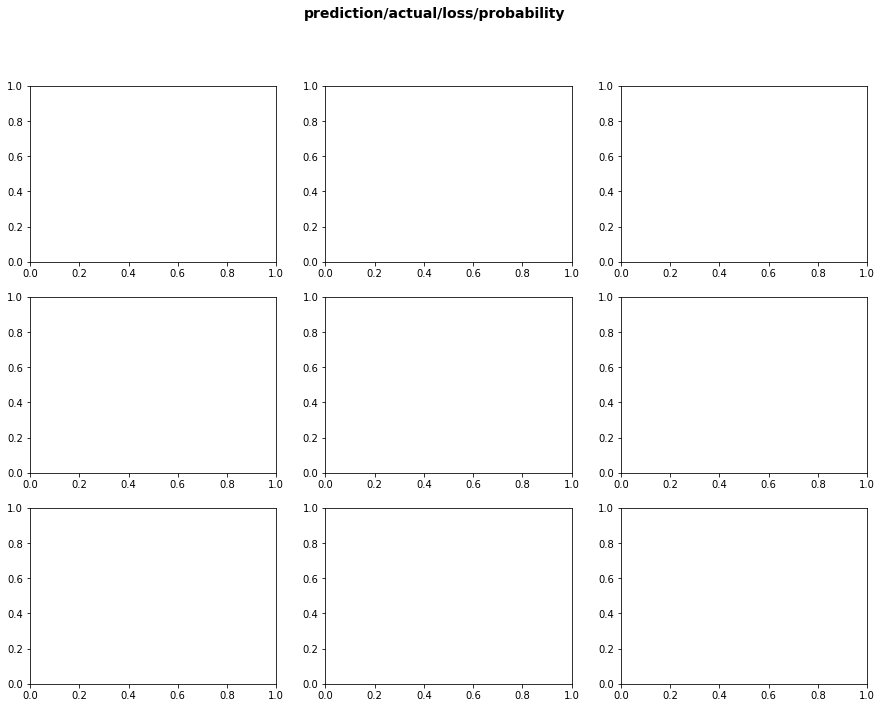

In [0]:
plot_top_losses_heatmap(9,learn,True)

In [0]:
#prediction 
learn.export()

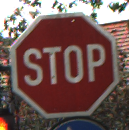

In [0]:
img = open_image('/content/traffic/test/03403.png')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category 14

In [0]:

pred_class.obj

'14'

In [0]:
pred_idx

tensor(6)

In [0]:
outputs

tensor([5.8419e-16, 7.6607e-15, 1.1960e-12, 3.4496e-16, 1.2746e-13, 1.3287e-13,
        1.0000e+00, 1.7908e-14, 4.4564e-19, 7.2905e-11, 5.0944e-16, 6.4981e-18,
        1.2903e-15, 1.2061e-15, 7.9755e-13, 3.6338e-14, 6.4129e-16, 9.2697e-12,
        8.6674e-16, 1.2485e-12, 4.8784e-15, 2.5377e-13, 3.1418e-12, 1.2740e-17,
        4.5382e-17, 2.1305e-16, 4.9095e-16, 9.9426e-17, 8.3646e-15, 1.1425e-15,
        2.5426e-13, 1.7621e-14, 6.6330e-17, 3.3638e-15, 3.9785e-16, 1.3179e-17,
        1.2296e-17, 3.2431e-18, 1.5330e-16, 5.2133e-18, 1.9033e-15, 3.4186e-14,
        1.3057e-14])

In [0]:
# Mapping ClassID to traffic sign names
signs = []
with open('label_names.txt', 'r') as csvfile:
    signnames = csv.reader(csvfile, delimiter='\t')
    next(signnames,None)
    for row in signnames:
        signs.append(row[1])
    csvfile.close()

In [0]:
signs[int(pred_class.obj)]